** Loading libraries **

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

** Loading data (copied from fivethirtyeight) **

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


** Cleaning up the header **

In [3]:
star_wars.iloc[0:10, 9:]
#star_wars[0,3] = 'seen: ' + star_wars[1,3].strip('Star Wars: ')
for index in range(3,9):
    star_wars.rename(
        columns={star_wars.columns[index]:'Seen: ' + star_wars.iloc[0,index].strip('Star Wars: ')},
        inplace=True
    )
for index in range(9,15):
    star_wars.rename(
        columns={star_wars.columns[index]:'Ranking: ' + star_wars.iloc[0,index].strip('Star Wars: ')},
        inplace=True
    )    
for index in range(15,29):
    star_wars.rename(
        columns={star_wars.columns[index]:'Popularity: ' + star_wars.iloc[0,index]},
        inplace=True
    )  
    
star_wars.drop(0, inplace=True)

** Setting RespondentID as index **

In [4]:
star_wars.set_index('RespondentID', inplace=True)
star_wars.head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Seen: Episode I The Phantom Menace,Seen: Episode II Attack of the Clone,Seen: Episode III Revenge of the Sith,Seen: Episode IV A New Hope,Seen: Episode V The Empire Strikes Back,Seen: Episode VI Return of the Jedi,Ranking: Episode I The Phantom Menace,Ranking: Episode II Attack of the Clone,...,Popularity: Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
RespondentID,,,,,,,,,,,,,,,,,,,,,
3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


** Converting columns 1 and 2 into boolean**

In [5]:
yes_no = {
    'Yes': True,
    'No': False 
}

star_wars.iloc[:,0] = star_wars.iloc[:,0].map(yes_no)
star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)

** Cleaning up the 'Ranking: X' columns **

In [6]:
for index in range(2,8):
    col_name = star_wars.columns[index]
    star_wars[col_name] = pd.notnull(star_wars[col_name])
    
star_wars[star_wars.columns[8:14]] = star_wars[star_wars.columns[8:14]].astype(float)

** Transforming 'Popularity' columns into intergervalues ('Unfamiliar (N/A)' -> NaN) **

In [7]:
string_to_number = {
    'Very favorably' : 2,
    'Somewhat favorably' : 1,
    'Neither favorably nor unfavorably (neutral)' : 0,
    'Somewhat unfavorably' : -1,
    'Very unfavorably' : -2,
    'Unfamiliar (N/A)' : None,
    None : None
}
no_nan = star_wars[star_wars.columns[14:28]].fillna('Unfamiliar (N/A)')
star_wars[star_wars.columns[14:28]] = no_nan.applymap(lambda x: string_to_number[x])


** Removing columns not interesting to me **

In [8]:
star_wars.drop(star_wars.columns[28:31],inplace=True,axis=1)

** Converting column 28 into boolean **

In [9]:
star_wars.iloc[:,28] = star_wars.iloc[:,28].map(yes_no);

** Which star wars movies has the best ranking? (lower is better) **

In [10]:
ranking = star_wars.iloc[:,8:14]
ranking_means = ranking.apply(np.mean)
ranking_std = ranking.apply(np.std)

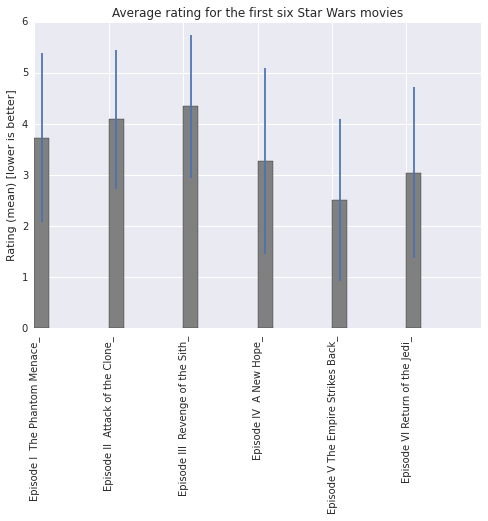

In [11]:
width = 0.2 
index = np.arange(len(ranking_means))

fig, ax = plt.subplots()
rects = ax.bar(index, ranking_means, width, color='grey', yerr=ranking_std)
ax.set_ylabel('Rating (mean) [lower is better]')
ax.set_title('Average rating for the first six Star Wars movies')
ax.set_xticks(index)
ax.set_xticklabels([(x + "_").strip('Ranking: ') for x in ranking.columns], rotation='vertical');

Just by looking at the bar-plot above it seems the be obvious that 'The Empire Strikes Back' is the movie with the best rating. Since the standard deviation is rather high statistical testing would be needed clarify if the result is significant or not. It also seems to be the case that the old Movies (Episodes IV - VI) are more popular than the new ones (Episodes I - III).

** How many people have seen the Movies? **

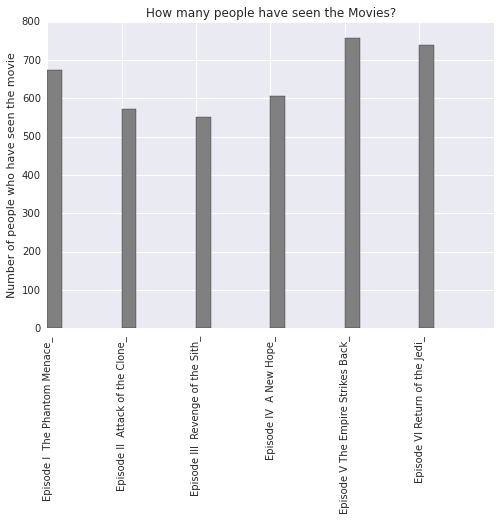

In [12]:
seen = star_wars.iloc[:,2:8]
seen_sum = seen.apply(np.sum)
#ranking_std = ranking.apply(np.std)
width = 0.2 
index = np.arange(len(seen_sum))

fig, ax = plt.subplots()
rects = ax.bar(index, seen_sum, width, color='grey')
ax.set_ylabel('Number of people who have seen the movie')
ax.set_title('How many people have seen the Movies? ')
ax.set_xticks(index)
ax.set_xticklabels([(x + "_").strip('Seen: ') for x in seen.columns], rotation='vertical');

** Let's see how 'seen' and 'rating' are correlated **

In [13]:
print(np.corrcoef(seen_sum,ranking_means)[0,1])

-0.878126494138


What the figure depicting the number of people who have seen the movies in comparrison to the movie ratings suggests is correlation between the two. A correlation coefficient (Pearson) of -0.878 confirms this impression. Remember that a low rating here means that people like the movie.
One possible explanation for this could simply be that quality causes sales. People hear good things about at movie and that raises the likelyhood for them to wacth the movie themselfs.
Another explanation would be that people who watched a movie tend to rate it better than movies they haven't seen. 

** Is there a difference between men and woman? **

In [14]:
males = star_wars[star_wars["Gender"] == "Male"]
males_ranking = males.iloc[:,8:14]

females = star_wars[star_wars["Gender"] == "Female"]
females_ranking = females.iloc[:,8:14]

males_ranking_means = males_ranking.apply(np.mean)
males_ranking_std = males_ranking.apply(np.std)

females_ranking_means = females_ranking.apply(np.mean)
females_ranking_std = females_ranking.apply(np.std)


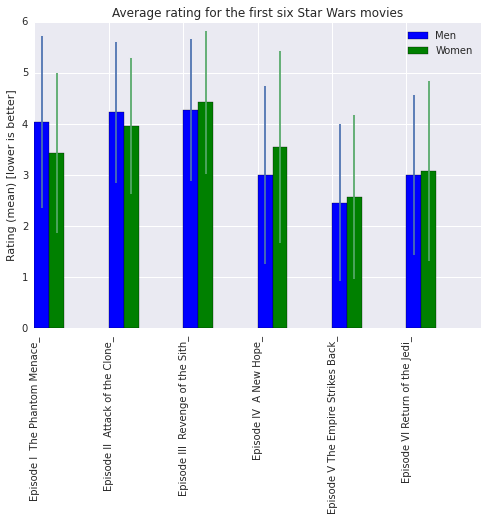

In [15]:
width = 0.2 
index = np.arange(len(ranking_means))

fig, ax = plt.subplots()
rects_men = ax.bar(index, males_ranking_means, width, color='blue', yerr=males_ranking_std)
rects_women = ax.bar(index + width, females_ranking_means, width, color='green', yerr=females_ranking_std)

ax.set_ylabel('Rating (mean) [lower is better]')
ax.set_title('Average rating for the first six Star Wars movies')
ax.set_xticks(index)
ax.set_xticklabels([(x + "_").strip('Ranking: ') for x in ranking.columns], rotation='vertical');


ax.legend((rects_men[0], rects_women[0]), ('Men', 'Women'));

Overall the difference between the to groups is rather small. Women seem to have a slight preference for the newer trilogy. The largest difference can be seen in the rating of Episode I.

In [16]:
males = star_wars[star_wars["Gender"] == "Male"]
males_seen = males.iloc[:,2:8]

females = star_wars[star_wars["Gender"] == "Female"]
females_seen = females.iloc[:,2:8]

males_seen_norm = males_seen.apply(np.sum) / len(males) * 100 

females_seen_norm = females_seen.apply(np.sum) / len(females) * 100 

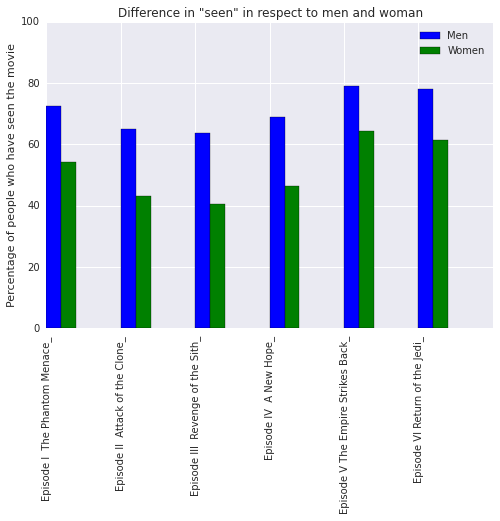

In [17]:
width = 0.2 
index = np.arange(len(ranking_means))

fig, ax = plt.subplots()
rects_men = ax.bar(index, males_seen_norm, width, color='blue')
rects_women = ax.bar(index + width, females_seen_norm, width, color='green')

ax.set_ylabel('Percentage of people who have seen the movie')
ax.set_title('Difference in "seen" in respect to men and woman')
ax.set_ylim([0,100])
ax.set_xticks(index)
ax.set_xticklabels([(x + "_").strip('Ranking: ') for x in ranking.columns], rotation='vertical');


ax.legend((rects_men[0], rects_women[0]), ('Men', 'Women'));

In [18]:
np.mean(males_seen_norm - females_seen_norm)

19.460234387502915

The basic pattern of the 'seen' variable looks similar for men and woman compared to the bar-plot of both genders combined. The striking difference is of course that the star wars movies seem to be a lot less popular among women. The average difference in the grouped 'seen'-variable is 19.46%.



    Try to segment the data by columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
    Clean up columns 15 to 29, which have to do with what characters are viewed favorably and unfavorably.
        Which character is the most liked?
        Which character is the most disliked?
        Which character creates the most controversy? (split between dislikes and likes)
